<h2 style='color:blue' align='center'>Lungs Disease  Image Classification<h2>

# Import Library

In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import os
import PIL

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential

In [3]:
import shutil

In [4]:
path_to_data = "./Training/"
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
    print(entry)

<DirEntry 'NORMAL'>
<DirEntry 'PNEUMONIA'>


In [5]:
img_dirs

['./Training/NORMAL', './Training/PNEUMONIA']

In [6]:
XRay_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    XRay_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    XRay_file_names_dict[XRay_name] = file_list
XRay_file_names_dict
    

{'NORMAL': ['./Training/NORMAL\\IM-0115-0001.jpeg',
  './Training/NORMAL\\IM-0117-0001.jpeg',
  './Training/NORMAL\\IM-0119-0001.jpeg',
  './Training/NORMAL\\IM-0122-0001.jpeg',
  './Training/NORMAL\\IM-0125-0001.jpeg',
  './Training/NORMAL\\IM-0127-0001.jpeg',
  './Training/NORMAL\\IM-0128-0001.jpeg',
  './Training/NORMAL\\IM-0129-0001.jpeg',
  './Training/NORMAL\\IM-0131-0001.jpeg',
  './Training/NORMAL\\IM-0133-0001.jpeg',
  './Training/NORMAL\\IM-0135-0001.jpeg',
  './Training/NORMAL\\IM-0137-0001.jpeg',
  './Training/NORMAL\\IM-0140-0001.jpeg',
  './Training/NORMAL\\IM-0141-0001.jpeg',
  './Training/NORMAL\\IM-0143-0001.jpeg',
  './Training/NORMAL\\IM-0145-0001.jpeg',
  './Training/NORMAL\\IM-0147-0001.jpeg',
  './Training/NORMAL\\IM-0149-0001.jpeg',
  './Training/NORMAL\\IM-0151-0001.jpeg',
  './Training/NORMAL\\IM-0152-0001.jpeg',
  './Training/NORMAL\\IM-0154-0001.jpeg',
  './Training/NORMAL\\IM-0156-0001.jpeg',
  './Training/NORMAL\\IM-0158-0001.jpeg',
  './Training/NORMAL\\IM

In [7]:
XRay_file_names_dict.keys()

dict_keys(['NORMAL', 'PNEUMONIA'])

In [8]:
class_dict = {}
count = 0
for XRay_name in XRay_file_names_dict.keys():
    class_dict[XRay_name] = count
    count = count + 1
class_dict

{'NORMAL': 0, 'PNEUMONIA': 1}

## Preprocessing: Use wavelet transform as a feature for traning our model

In [9]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

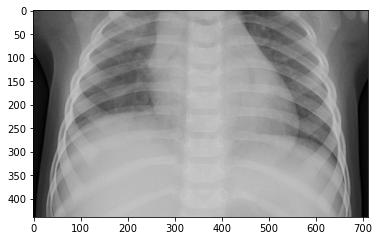

In [10]:
img = cv2.imread('./Training/PNEUMONIA/person1_bacteria_1.jpeg')
plt.imshow(img)

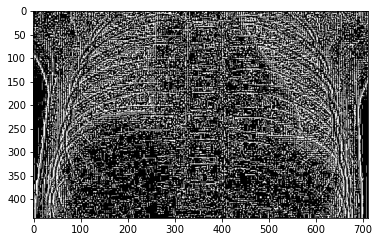

In [11]:
im_har = w2d(img,'db1',2)
plt.imshow(im_har, cmap='gray')

In [13]:
img1 = cv2.imread('./Training/Normal/IM-0115-0001.jpeg')
img1.shape

(1858, 2090, 3)

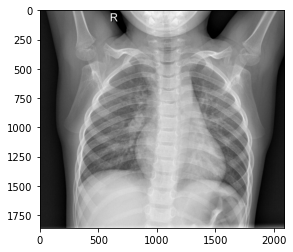

In [14]:
plt.imshow(img1)

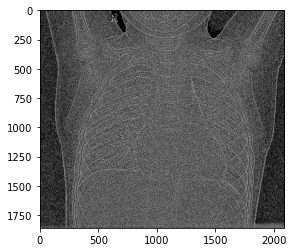

In [13]:
im_har = w2d(img1,'db1',2)
plt.imshow(im_har, cmap='gray')

In [14]:
X, y = [], []
for XRay_name, training_files in XRay_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[XRay_name])

In [15]:
XRay_file_names_dict.keys()

dict_keys(['NORMAL', 'PNEUMONIA'])

In [16]:
XRay_name

'PNEUMONIA'

In [17]:
y[1340:1360]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [18]:
X = np.array(X).reshape(len(X),len(X[0])).astype(float)
#y = np.array(y).reshape(len(y),len(X[0])).astype(float)
a=X
b=y
X

array([[ 19.,  19.,  19., ..., 230., 229., 230.],
       [ 31.,  31.,  31., ..., 215.,   0.,   0.],
       [  0.,   0.,   0., ...,   5., 254.,   0.],
       ...,
       [ 28.,  28.,  28., ..., 222.,   3.,   3.],
       [ 46.,  46.,  46., ..., 240.,   6.,  32.],
       [ 11.,  11.,  11., ..., 244., 253., 254.]])

In [19]:
b[2000]

1

In [20]:
a

array([[ 19.,  19.,  19., ..., 230., 229., 230.],
       [ 31.,  31.,  31., ..., 215.,   0.,   0.],
       [  0.,   0.,   0., ...,   5., 254.,   0.],
       ...,
       [ 28.,  28.,  28., ..., 222.,   3.,   3.],
       [ 46.,  46.,  46., ..., 240.,   6.,  32.],
       [ 11.,  11.,  11., ..., 244., 253., 254.]])

<h3 style='color:purple'>Train test split</h3>

In [21]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

## Support Vector Machine implementation

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9678899082568807

In [23]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       334
           1       0.97      0.98      0.98       974

    accuracy                           0.97      1308
   macro avg       0.96      0.95      0.96      1308
weighted avg       0.97      0.97      0.97      1308



In [24]:
y_predicted = pipe.predict(X_test)

In [25]:
y_predicted[:5]

array([1, 1, 1, 1, 1])

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[309,  25],
       [ 17, 957]], dtype=int64)

Text(51.0, 0.5, 'Truth')

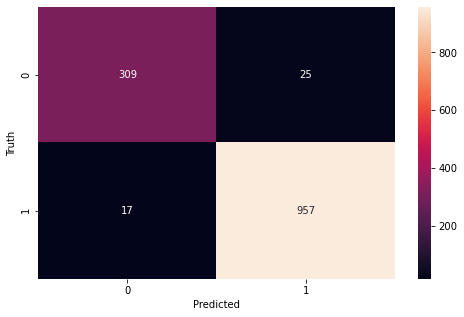

In [27]:
import seaborn as sn
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Saving the Trained Model using joblib

In [47]:
import joblib

In [48]:
joblib.dump(pipe,'Model_Joblib.pkl')

['Model_Joblib.pkl']

In [49]:
jb = joblib.load('Model_Joblib.pkl')

In [50]:
jb.predict(a)

array([0, 0, 0, ..., 1, 1, 1])

In [51]:
b

array([0, 0, 0, ..., 1, 1, 1])

<h3 style='color:purple'>Preprocessing: scale images</h3>


In [29]:
b = np.array(b)

In [30]:
X_train_flattened = a.reshape(len(a), len(a[0]))
X_train_flattened.shape

(5232, 4096)

In [31]:
X_train_flattened[0]

array([ 19.,  19.,  19., ..., 230., 229., 230.])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, b, random_state=0)

In [33]:
len(X_train)

3924

In [34]:
len(X_test)


1308

In [35]:
len(y_train)

3924

In [36]:
y[9]

0

<h3 style='color:purple'> Build  neural network and train the model </h3>

In [37]:
 model = keras.Sequential([
     keras.layers.Dense(64, input_shape=(4096,), activation='linear'),
     keras.layers.Dense(2, activation='softmax')
 ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
123/123 [==============================] - 1s 3ms/step - loss: 209.6756 - accuracy: 0.8193
Epoch 2/50
123/123 [==============================] - 0s 2ms/step - loss: 19.8255 - accuracy: 0.9228
Epoch 3/50
123/123 [==============================] - 0s 2ms/step - loss: 16.9408 - accuracy: 0.9251
Epoch 4/50
123/123 [==============================] - 0s 2ms/step - loss: 18.6395 - accuracy: 0.9238
Epoch 5/50
123/123 [==============================] - 0s 2ms/step - loss: 12.7934 - accuracy: 0.9393
Epoch 6/50
123/123 [==============================] - 0s 2ms/step - loss: 5.6510 - accuracy: 0.9661
Epoch 7/50
123/123 [==============================] - 0s 2ms/step - loss: 14.6702 - accuracy: 0.9388
Epoch 8/50
123/123 [==============================] - 0s 2ms/step - loss: 3.4195 - accuracy: 0.9730
Epoch 9/50
123/123 [==============================] - 0s 2ms/step - loss: 3.4360 - accuracy: 0.9676
Epoch 10/50
123/123 [==============================] - 0s 2ms/step - loss: 1.7248 - accuracy:

In [38]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 1ms/step - loss: 1.7299 - accuracy: 0.9534


[1.7298591136932373, 0.9533638954162598]

In [39]:
y_predicted = model.predict(X_test)
y_predicted[0]

array([0., 1.], dtype=float32)

In [40]:
np.argmax(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [41]:
y_predicted_labels[:5]

[1, 1, 1, 0, 1]

In [42]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[293,  41],
       [ 20, 954]])>

Text(69.0, 0.5, 'Truth')

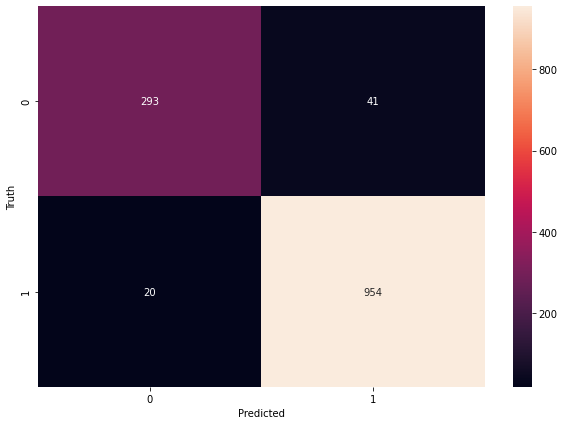

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')